In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

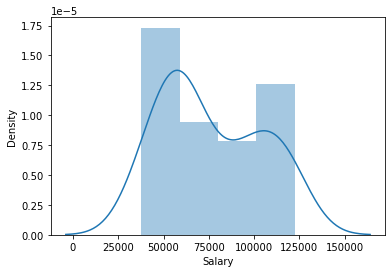

In [5]:
import seaborn as sns
sns.distplot(data['Salary'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

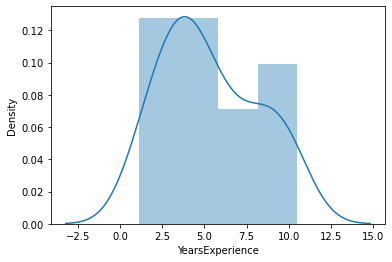

In [6]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

In [7]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

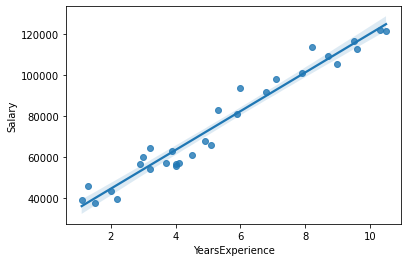

In [8]:
sns.regplot(x='YearsExperience', y='Salary', data=data);

In [9]:
#coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
#Salary=25792.20+9449.96*YearsExperience

In [11]:
#t and p-value
print(model.tvalues,'n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 n Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [13]:
#predict for 11 & 12 yearsexperience
newdata=pd.Series([11,12])

In [14]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [15]:
model.predict(data_pred)

0    129741.785735
1    139191.748056
dtype: float64

In [17]:
#log Transformation
import numpy as np
data['log_Salary']=np.log(data.Salary)
print(data.head())

   YearsExperience   Salary  log_Salary
0              1.1  39343.0   10.580073
1              1.3  46205.0   10.740843
2              1.5  37731.0   10.538237
3              2.0  43525.0   10.681091
4              2.2  39891.0   10.593906


In [19]:
import statsmodels.formula.api as smf
model2 = smf.ols("log_Salary~YearsExperience",data = data).fit()

In [31]:
fitted_value = model2.predict(data)
residuals2 = data.log_Salary - fitted_value

In [32]:
print(model2.params)

Intercept          10.507402
YearsExperience     0.125453
dtype: float64


In [33]:
#log(Salary)=10.50+0.12*YearsExperience
import numpy as np
np.exp(0.12)

1.1274968515793757